In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


오토인코더는 아주 간단하면서 강력한 비지도 학습 딥러닝 모델이다.  
입력값을 압축시킨 후, 다시 압축된 정보를 복원해서 입력값과 동일한 출력값을 가지도록 리턴하는 학습 모델이다.  
학습 과정을 통해 최대한 입력값과 출력값이 일치하도록 모델 파라미터가 최적화되고 오토인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어 주로 차원 축소의 목적으로 오토인코더가 많이 사용된다.

<img src="./autoencoder.png" width="900" align="left"/>

오토인코더는 크게 인코도와 디코더로 구분돼 있고, 인코더와 디코더 사이에는 압축된 정보가 존재한다.  
인코더와 디코더는 덴즈 레이어로 구성돼 있고, 인코더와 디코더 사이에는 입력 원본값보다 작은 차원을 갖는 덴즈 레이어를 두어 정보를 압축한다.

MNIST 손글씨 데이터를 오토인코더를 사용해서 차원 축소 후 시각화한다.

MNIST 손글씨 데이터를 획득한다.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


MNIST 데이터 전처리  
획득된 학습 데이터는 오토인코더 학습에 사용하고 테스트 데이터 중 500개의 데이터만 선택해서 시각화에 사용한다.

In [3]:
x_train = x_train.reshape(60000, 784) # 학습 데이터

# 테스트 데이터 중 500개만 선택해서 테스트 데이터로 사용한다. => 데이터 시각화에 사용한다.
x_test = x_test[:500]
x_test = x_test.reshape(500, 784) # 테스트 데이터
y_test = y_test[:500]

# 데이터 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

텐서플로우 모델을 만든다.

In [4]:
# 텐서플로우 모델을 구현한다. 손실 함수는 입력값과 출력값의 차이를 최소화하는 것으로 설정한다.
_input = tf.placeholder(dtype=tf.float32, shape=[None, 28 * 28]) # 입력
encoder = tf.layers.dense(_input, 128, tf.nn.tanh) # 인코더
bottlenect = tf.layers.dense(encoder, 3) # 3차원으로 차원축소
decoder = tf.layers.dense(bottlenect, 128, tf.nn.tanh) # 디코더
_output = tf.layers.dense(decoder, 28 * 28, tf.nn.sigmoid) # 출력
loss = tf.losses.mean_squared_error(labels=_input, predictions=_output) # 손실함수
train = tf.train.AdamOptimizer(0.002).minimize(loss) # 최적화

학습 데이터를 batch_size개씩 나눠서 데이터 학습을 진행한다.

In [5]:
tf.set_random_seed(35)
epoch_cnt = 50
batch_size = 5000
iteration = len(x_train) // batch_size
# print(iteration)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('학습 시작...')
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0
        end = batch_size
        for i in range(iteration):
            _, loss_ = sess.run([train, loss], feed_dict={_input: x_train[start:end]})
            start += batch_size
            end += batch_size
            # 손실 계산
            avg_loss += loss_ / iteration
        # ===== for i
        print('epoch: {:2d}, train loss: {:5.3f}'.format(epoch, avg_loss))
    # ===== 학습 종료
    # 학습을 완료한 후 오토인코더의 3차원으로 압축된 벡터를 별도로 저장한다.
    _bottlenect = sess.run(bottlenect, feed_dict={_input: x_test})

학습 시작...
epoch:  0, train loss: 0.162
epoch:  1, train loss: 0.072
epoch:  2, train loss: 0.068
epoch:  3, train loss: 0.067
epoch:  4, train loss: 0.065
epoch:  5, train loss: 0.063
epoch:  6, train loss: 0.061
epoch:  7, train loss: 0.059
epoch:  8, train loss: 0.058
epoch:  9, train loss: 0.057
epoch: 10, train loss: 0.056
epoch: 11, train loss: 0.056
epoch: 12, train loss: 0.055
epoch: 13, train loss: 0.055
epoch: 14, train loss: 0.054
epoch: 15, train loss: 0.054
epoch: 16, train loss: 0.054
epoch: 17, train loss: 0.053
epoch: 18, train loss: 0.053
epoch: 19, train loss: 0.053
epoch: 20, train loss: 0.052
epoch: 21, train loss: 0.052
epoch: 22, train loss: 0.052
epoch: 23, train loss: 0.051
epoch: 24, train loss: 0.051
epoch: 25, train loss: 0.050
epoch: 26, train loss: 0.050
epoch: 27, train loss: 0.049
epoch: 28, train loss: 0.049
epoch: 29, train loss: 0.049
epoch: 30, train loss: 0.048
epoch: 31, train loss: 0.048
epoch: 32, train loss: 0.048
epoch: 33, train loss: 0.047
epoch

압축된 데이터를 시각화 한다.

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams

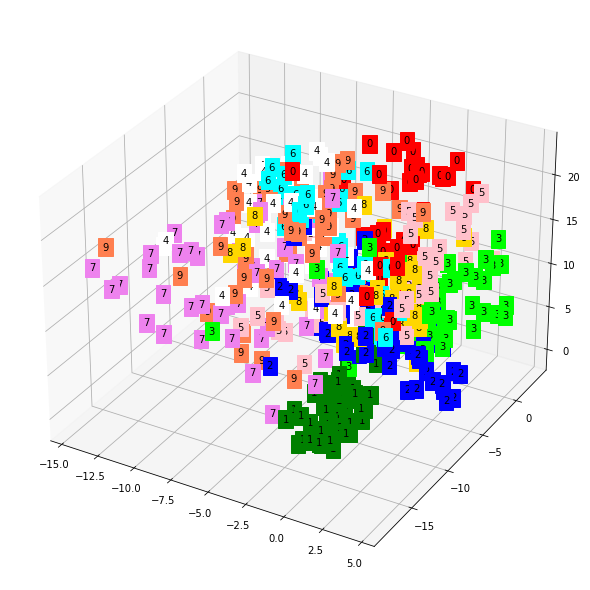

In [7]:
rcParams['figure.figsize'] = [10, 8]
fig = plt.figure(1)
ax = Axes3D(fig)

xs = _bottlenect[:, 0]
ys = _bottlenect[:, 1]
zs = _bottlenect[:, 2]

color = ['red', 'green', 'blue', 'lime', 'white', 'pink', 'aqua', 'violet', 'gold', 'coral']
for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())
plt.show()

간단한 오토인코도임에도 784(28 * 28) 차원의 MNIST 데이터가 3차원으로 잘 축소되서 시각화했을 때 동일한 숫자를 의미하는 데이터포인트가 잘 군집된것을 확인할 수 있다.